<div align='center'><picture><source srcset="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" type="image/webp"><img src="https://seaborn.pydata.org/_images/logo-tall-lightbg.svg" width="300" height="300"></picture></div>

# **Article 127 : Plotting with Seaborn** [![Static Badge](https://img.shields.io/badge/Open%20in%20Colab%20-%20orange?style=plastic&logo=googlecolab&labelColor=grey)](https://colab.research.google.com/github/sshrizvi/DataScienceMastery/blob/main/DataVisualization/Notebooks/127_plotting_with_seaborn.ipynb)

|🔴 **NOTE** 🔴|
|:-----------:|
| This notebook contains the practical implementations of the concepts discussed in the following article.|
| Here is Article 127 - [Plotting with Seaborn](../Articles/127_plotting_with_seaborn.md) |

### 📦 **Importing Relevant Libraries**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### ⚠️ **Data Warning**  
For the visualizations ahead, we will be using following datasets.

In [2]:
tips = sns.load_dataset('tips')

In [3]:
gap_df = px.data.gapminder()

In [101]:
iris_df = sns.load_dataset('iris')

## **Relational Plots**

### 🎯 **Scatter Plot**

We can plot a Scatter Plot in Seaborn using an Axes Level Function `sns.scatterplot()`.  
Lets plot a Scatter Plot of `TIPS` Dataset for understanding the relationship between `total_bill` and `tip` columns.

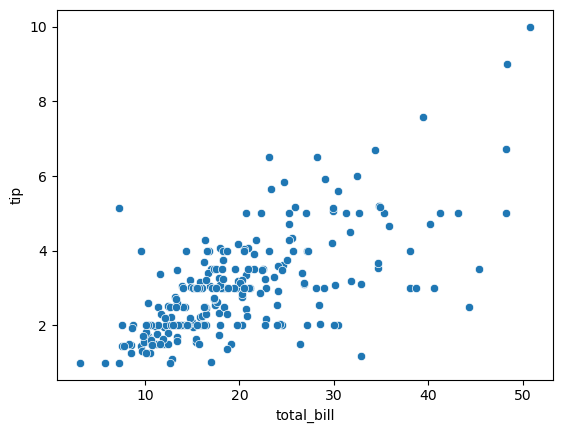

In [4]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

Another way (*recommended by Seaborn*) to plot the same Scatter Plot is by using a Figure Level Function `sns.relplot(kind='scatter')`.

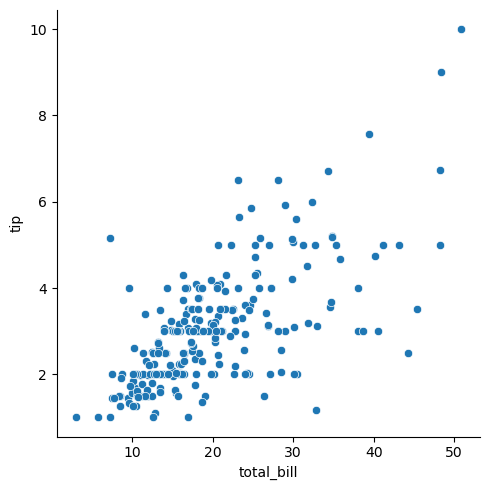

In [5]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter')
plt.show()

To distinguish among the points based on some additional information, we can set the `hue` parameter with a *categorical column* from the dataset.  
So, lets differentiate the points on the basis of the `sex` column.

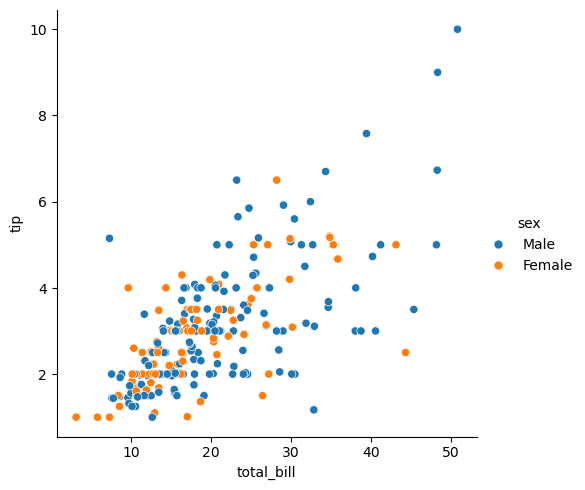

In [6]:
g = sns.relplot(data=tips,  kind='scatter', x='total_bill', y='tip',
                hue='sex')
plt.show()

Another paramter `style` can help to add another level of information to the plot by changing the *marker style*. The parameter `style` takes only the categorical column as input.

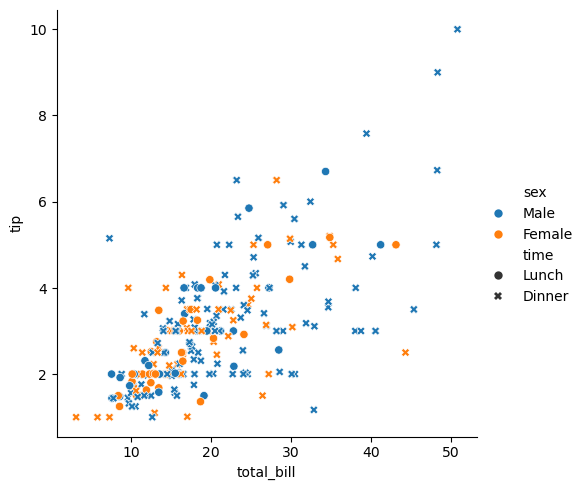

In [7]:
g = sns.relplot(data=tips,  kind='scatter', x='total_bill', y='tip',
                hue='sex', style='time')
plt.show()

Another parameter `size` can be used to add another level of information to the plot by adjusting the size of markers by providing a *numerical column* as input.

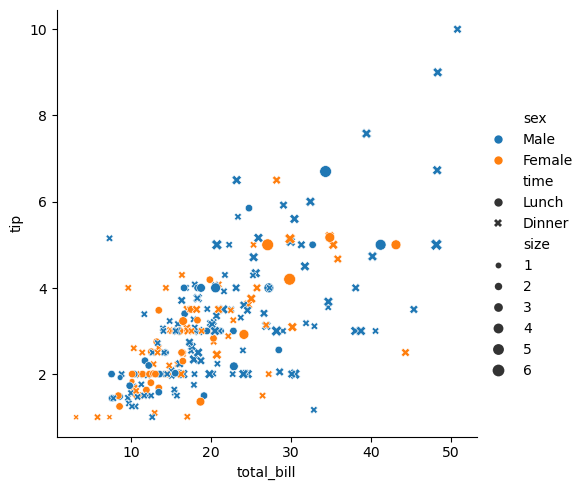

In [8]:
g = sns.relplot(data=tips,  kind='scatter', x='total_bill', y='tip',
                hue='sex', style='time', size='size')
plt.show()

### 🎯 **Line Plot**

Likewise Scatter Plot, we can plot a Line Plot using using both an Axes Level Function and a Figure Level Function.  
The Axes Level Function for Line Plot is `sns.lineplot()`, whereas the Figure Level Function is same as of Scatter Plot i.e., `sns.relplot()`, requiring a minor tweak in the `kind` paramter by setting its value to `line`.

Now, lets use the `gap_df` to plot the growth in the Life Expectancy in India.

So, first filter out the data for country India.

In [9]:
india_df = gap_df[gap_df['country'] == 'India']

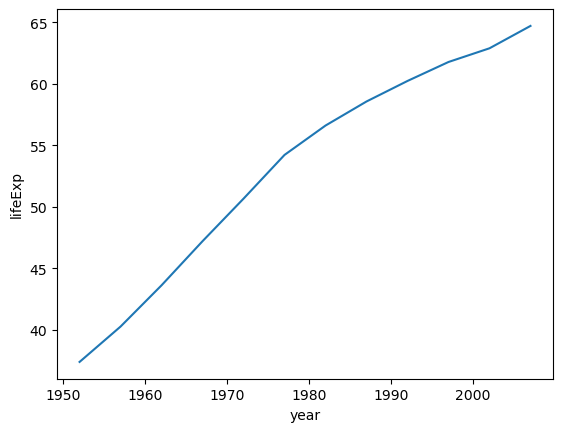

In [10]:
sns.lineplot(data=india_df, x='year', y='lifeExp')
plt.show()

Now, lets plot the same using the Figure Level Function.

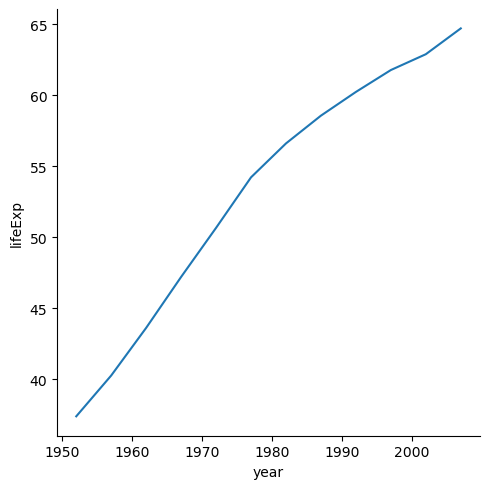

In [11]:
sns.relplot(kind='line', data=india_df, x='year', y='lifeExp')
plt.show()

The same Axes level parameters like `hue`, `style` can also be used here.  
Lets demonstrate it with the help of a simple example.

For the `hue` parameter, lets plot growth in Life Expectancy of India, Pakistan, & China.  
So, lets filter out the data first.

In [12]:
ipc_df = gap_df[gap_df['country'].isin(['India', 'Pakistan', 'China'])]

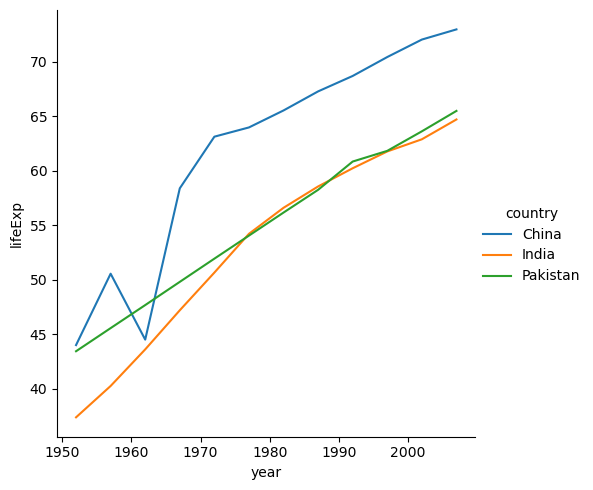

In [13]:
sns.relplot(kind='line', data=ipc_df, x='year', y='lifeExp',
            hue='country')
plt.show()

For the `style` parameter, lets plot the growth in the Life Expectancy of Multiple Countries, while decorating lines based on Continent.

So, lets filter the data first.

In [14]:
countries = ['India', 'Japan', 'China', 'Iran', 'Iraq', 'Austria', 'England', 'Kenya']
country_df = gap_df[gap_df['country'].isin(countries)]


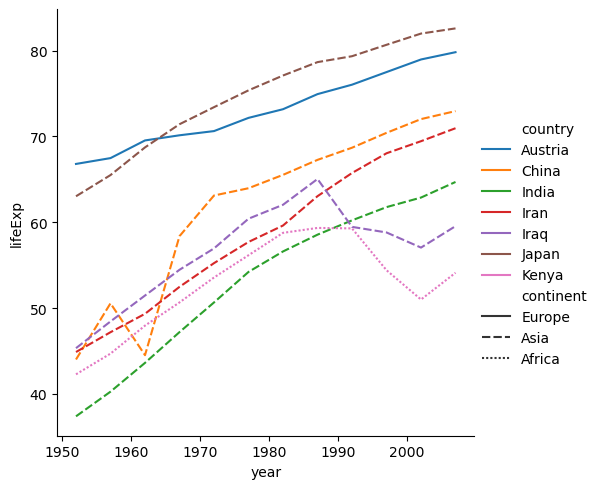

In [15]:
sns.relplot(kind='line', data=country_df, x='year', y='lifeExp',
            hue='country', style='continent')
plt.show()

### 🎯 **Facet Plot**

A facet plot is a visualization technique where the same type of plot is repeated across multiple subplots, each displaying a different subset of data based on categorical variables, enabling clear and consistent comparison of patterns.  

**INTUITION :** The core idea behind the implementation of Facet Plot is to *compare the same relationship across different groups* without changing the scale or design.  

**HOW ?**  Seaborn uses `seaborn.FacetGrid` class to implement Facet Plots. The main parameters used for this are `row`, `col`, and `col_wrap`, which are mainly the parameters of Figure Level Functions, which means these will not work with the Axes Level Functions.

Now, to understand the Facet Plot, see this.

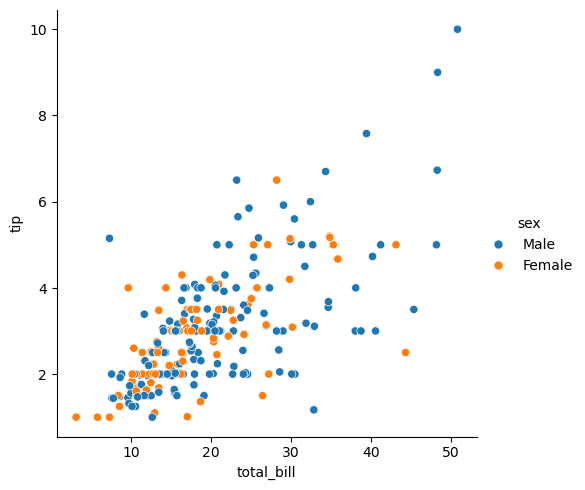

In [16]:
sns.relplot(kind='scatter', data=tips, x='total_bill', y='tip',
            hue='sex')
plt.show()

Now, in the above visualization, it is clear that the `Blue` markers represent `Male`, whereas `Orange` markers represents `Female`.  
But it would be better if we would be able to see the same relationship of `total_bill` V/S `tip` separately, for both sex.  

Here comes the Facet Plot.  
Use either `row` or `col` parameter to create desired Facet Plots by providing the `sex` column.

When you use the `col` parameter, it plots the visualization column by column.

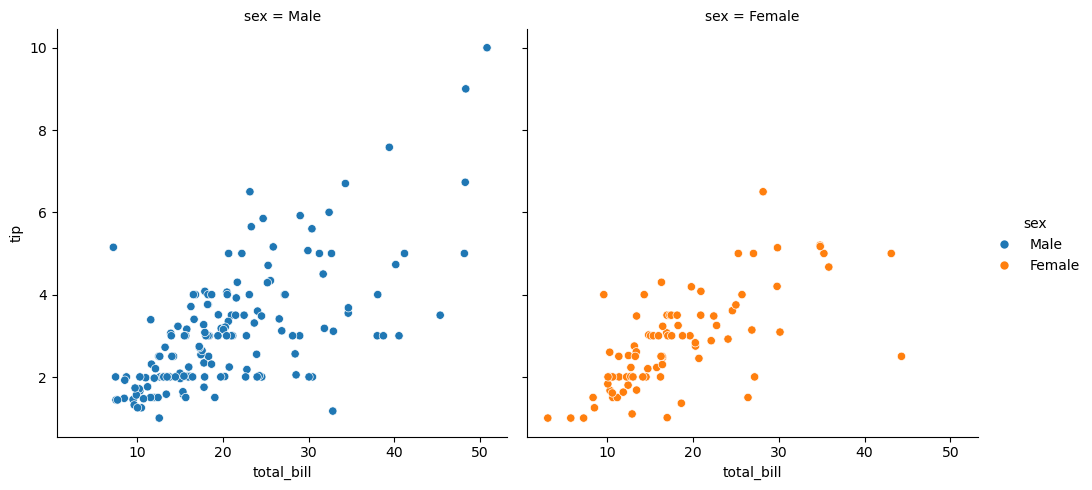

In [17]:
sns.relplot(kind='scatter', data=tips, x='total_bill', y='tip',
            col='sex', hue='sex')
plt.show()

When you pass the column name to `row` parameter, it plots the visualization row by row.

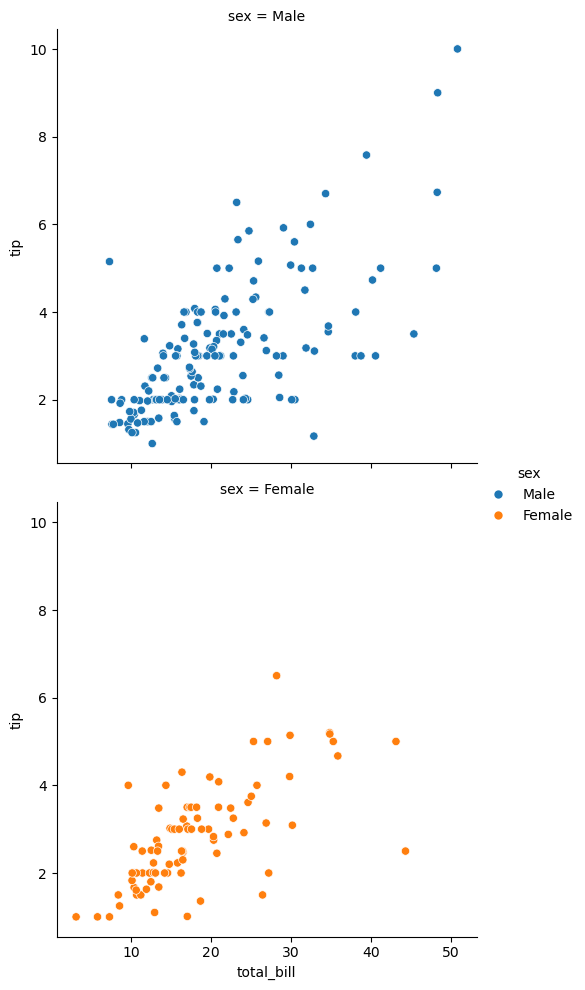

In [18]:
sns.relplot(kind='scatter', data=tips, x='total_bill', y='tip',
            row='sex', hue='sex')
plt.show()

Let's try another Facet Plot on the `gap_df`.  
We are gonna plot Scatter Plot to assess the relationship of `gdpPercap` V/S `lifeExp` for `4` random countries, grouped on the basis of `country`.

In [19]:
import random
countries = random.sample(population=list(gap_df.country.unique()), k=4)
country_df = gap_df[gap_df['country'].isin(countries)]

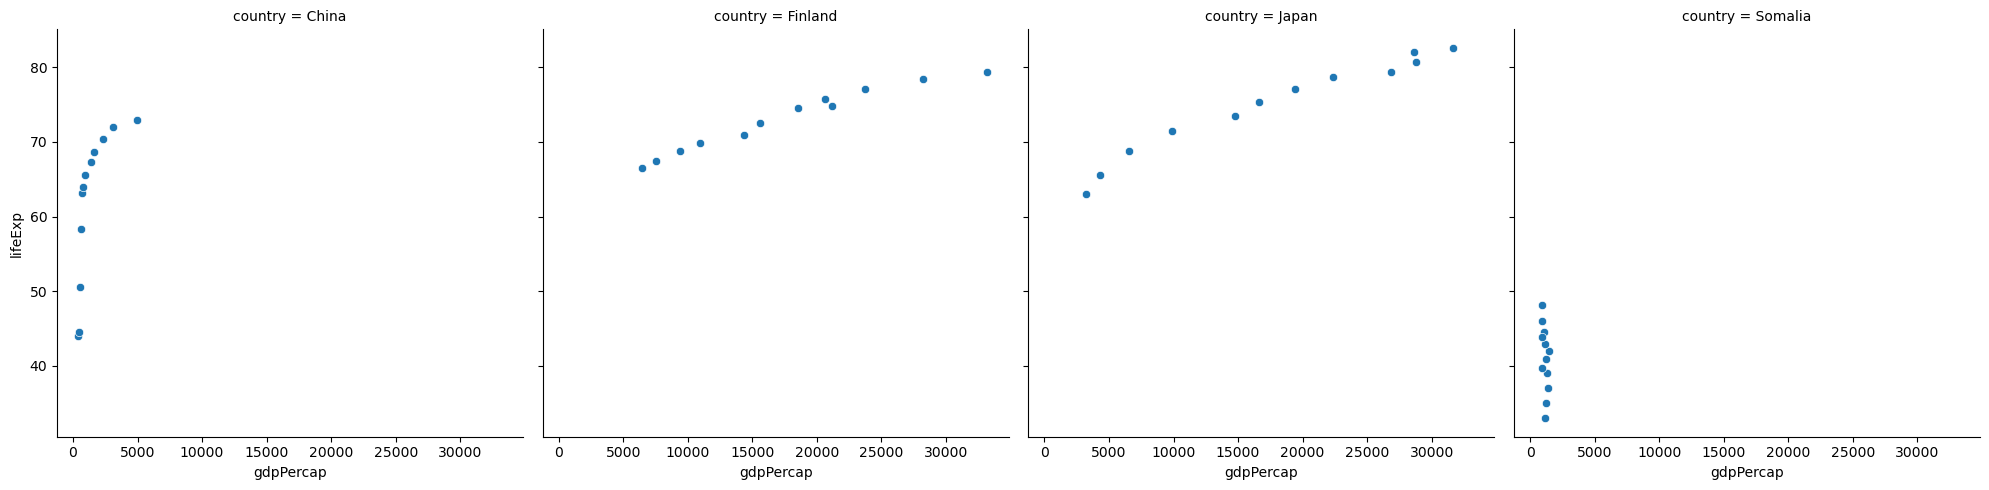

In [20]:
sns.relplot(kind='scatter', data=country_df, x='gdpPercap', y='lifeExp',
            col='country')
plt.show()

**PROBLEM :** You can see that the above visualization is a warning of Facet Plots. The warning is, ofcourse, the diminished size of the scatter plots, which is due to 4 Scatter Plots displayed in the same row. This happened because we used the `col` parameter, which adds every new plot in the new column, while keeping all of it in a row.  
This problem will continue to `row` parameter too. So, what's the solution.

**SOLUTION :** The solution to this problem is `col_wrap` parameter. As the name suggests, it will transfer the extra plots onto the next line, as the no. of columns defined using `col_wrap` will exceed.  

Here's a demonstration to the solution, for the same plot used above.

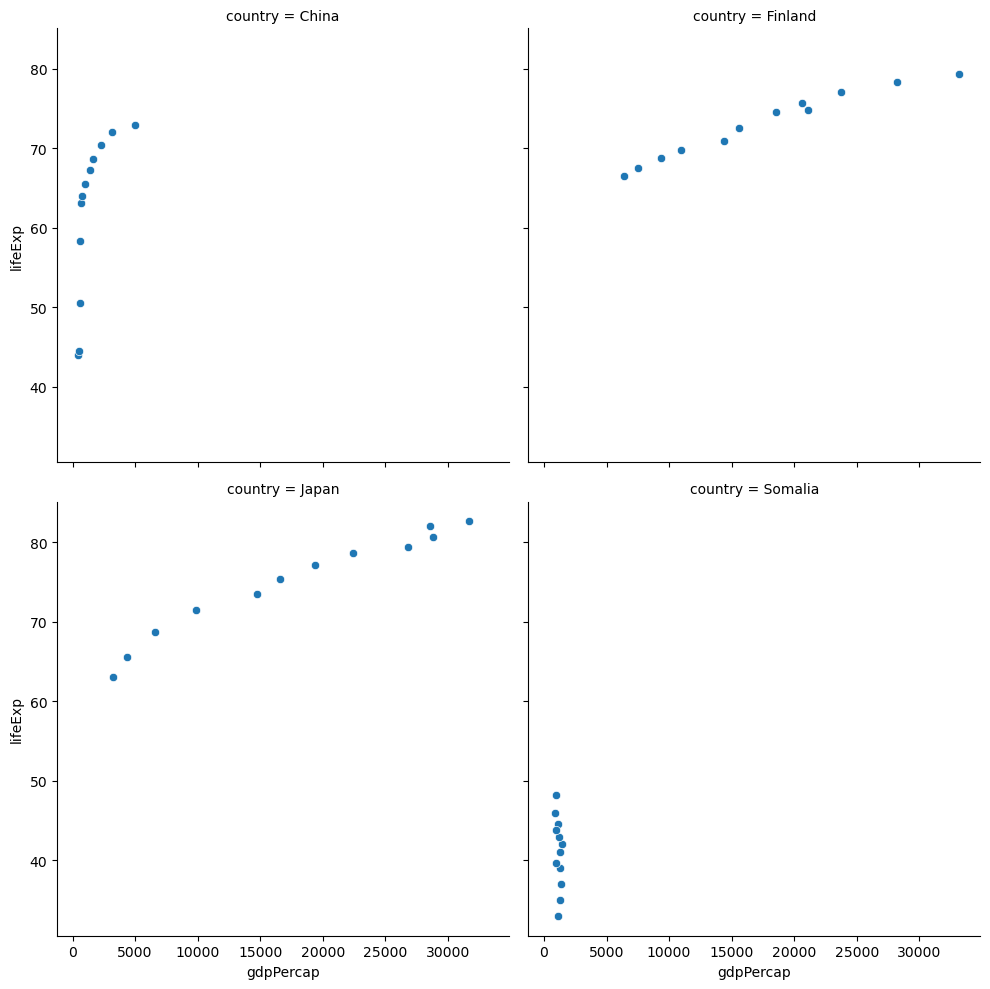

In [21]:
sns.relplot(kind='scatter', data=country_df, x='gdpPercap', y='lifeExp',
            col='country', col_wrap=2)
plt.show()

Now, its clearly visible that `col_wrap` does its magic. Since the `col_wrap` was set to `2`, hence, no more than 2 plots are in a row.

## **Distribution Plots**

### 🎯 **Histogram**

A histogram is a univariate statistical plot that represents the distribution of numerical data by grouping values into bins and displaying their frequency, density, or probability.

Now, lets assess the distribution of `tip` column (or variable) of the `tips` dataset. For this, lets first use the Axes Level Function.

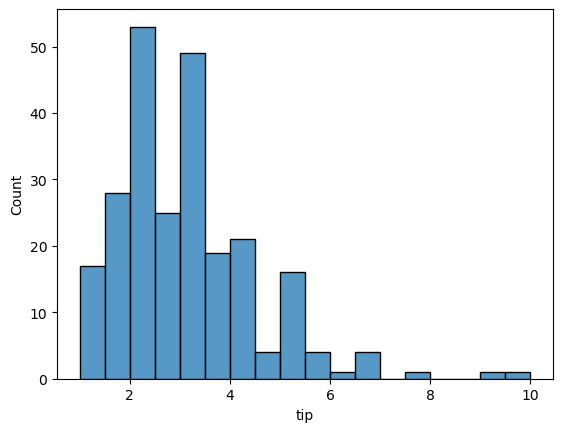

In [23]:
sns.histplot(data=tips, x='tip')
plt.show()

Now, lets use the Figure Level Function for assessing the distribution of `total_bill` column of the `tips` dataset.  
**Note :** Note that the Figure Level Function, by default, plots the histogram. So, it is not necessary to pass the `'hist'` to `kind` parameter.

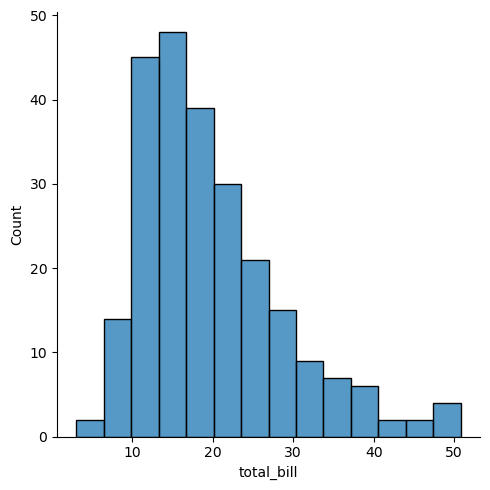

In [27]:
sns.displot(data=tips, x='total_bill', kind='hist')
plt.show()

Now, as we know that a core component of a Histogram is `bin`, which decides, in how many groups the data will be divided.  
So, here is the `bins` parameter of `sns.histplot()` or `sns.displot()`

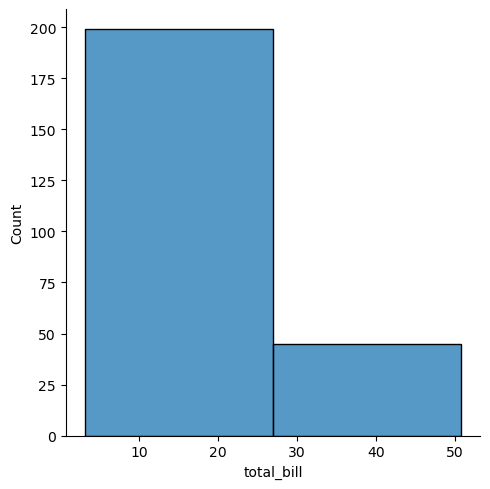

In [29]:
sns.displot(data=tips, x='total_bill', kind='hist', bins=2)
plt.show()

Though, a histogram is mainly used to study the distribution of *numerical data*, we can use the logic of histogram to assess the distribution of *categorical data*.  
Here is a clear demonstration of it, where we will be using the `day` column of `tips` dataset.

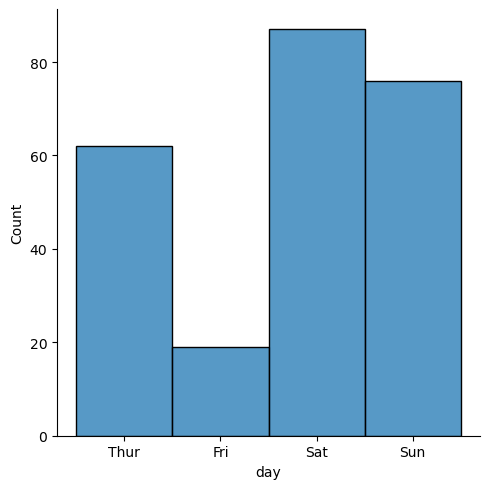

In [31]:
sns.displot(data=tips, x='day', kind='hist')
plt.show()

Likewise, Relational Plots, we also have a `hue` parameter that does its magic.

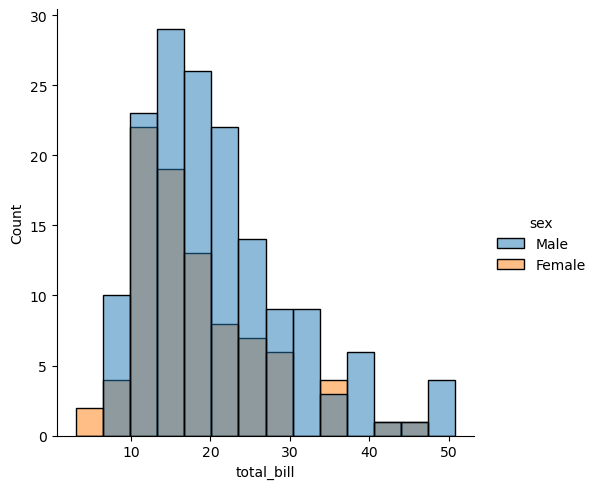

In [33]:
sns.displot(data=tips, x='total_bill', kind='hist', hue='sex')
plt.show()

When we passed `sex` column to `hue` parameter, what do you think would have happened?  
**ANSWER :** 
1. First, unique categories in the `sex` column is identified, which were `Male` and `Female`.  
2. Second, the data is filtered out separately for both the categories.  
3. Third, their respective histograms are plotted on the same Axes, with differentiating colors.

Now, since there are two histograms on top of one another, it is not so clear to interpret it.  
So, for that we can easily use the Facet Plots. All we have to do is to pass `sex` column to `col` parameter.

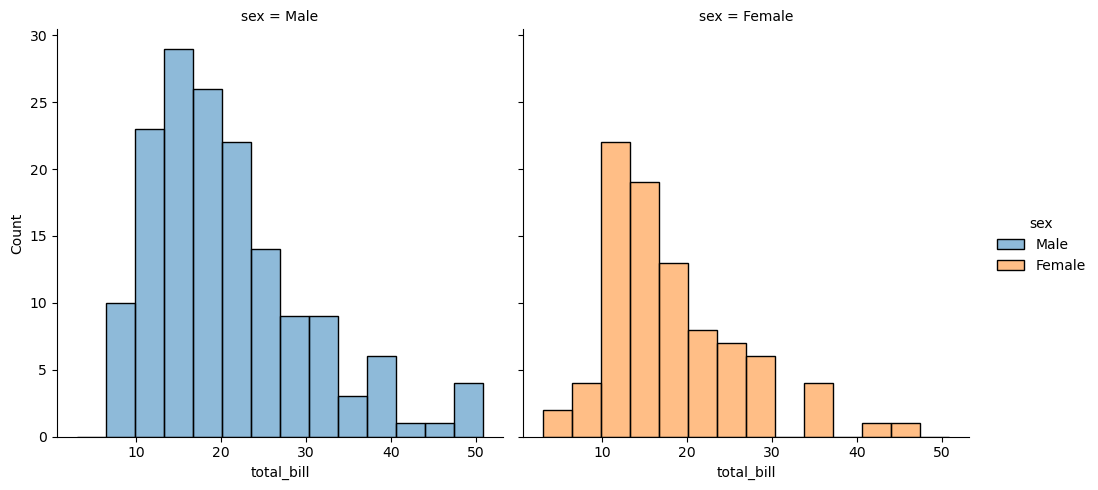

In [36]:
sns.displot(data=tips, x='total_bill', kind='hist',
            hue='sex', col='sex')
plt.show()

The combination of `hue` and `col` parameter, really slays.

### 🎯 **KDE**

Kernel Density Estimation (KDE) is a non-parametric method used to estimate the probability density function (PDF) of a continuous random variable by smoothing individual data points into a continuous curve.  

**What Actually Happens in KDE (Conceptual View)**

Instead of grouping data into bins (like a histogram), KDE works as follows:

1. Each data point is treated as the center of a small smooth curve, called a kernel
    - Commonly a Gaussian (bell-shaped) curve
2. The kernel is placed at every observation
    - All kernels have the same shape and width
3. All these kernels are summed and averaged
    - This creates a smooth continuous density curve
4. The resulting curve:
    - Approximates the underlying probability density
    - Has area = 1 (valid PDF)

Lets demonstrate the KDE for the `total_bill` column of `tips` dataset. For this, we will first use the Axes Level Function.

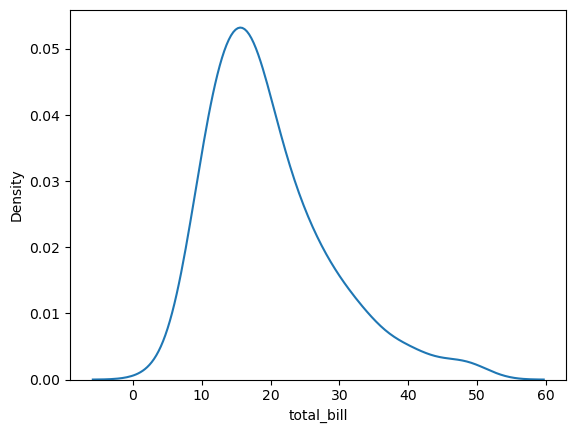

In [39]:
sns.kdeplot(data=tips, x='total_bill')
plt.show()

Now, lets do the same using a Figure Level Function.

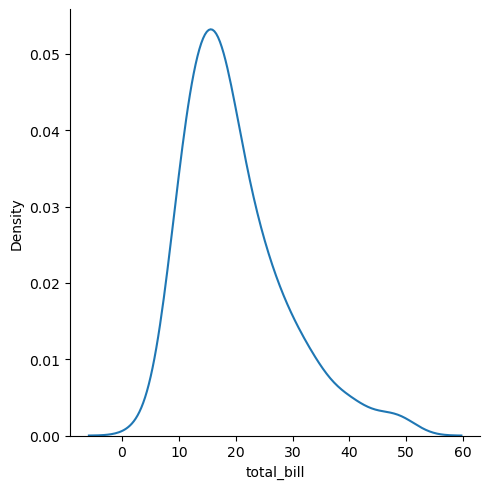

In [40]:
sns.displot(data=tips, x='total_bill', kind='kde')
plt.show()

Likewise other plots, we also have the `hue` parameter for KDE Plots.

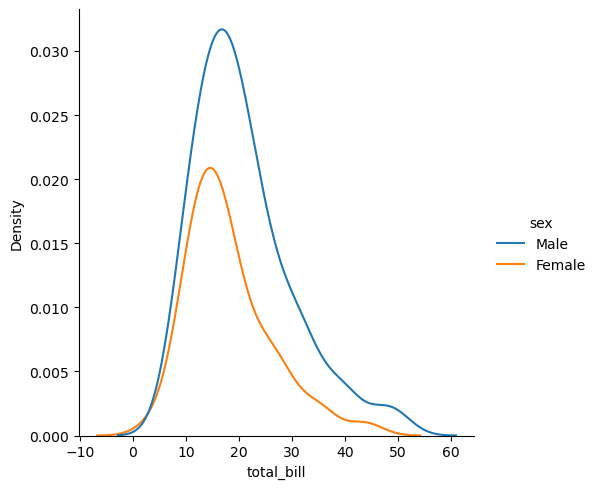

In [43]:
sns.displot(data=tips, x='total_bill', kind='kde',
            hue='sex')
plt.show()

In the above KDEs, we can clearly see that there is some area under the KDE lines. These area can be viewed in an interactive way, using the `fill` parameter by setting its value to `True`.

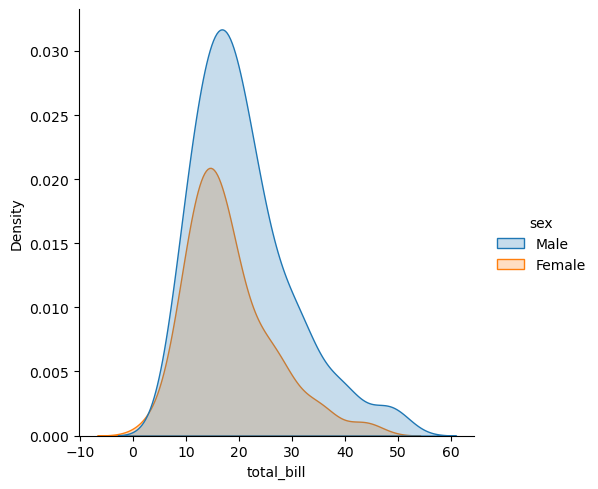

In [47]:
sns.displot(data=tips, x='total_bill', kind='kde',
            hue='sex', fill=True)
plt.show()

### 🎯 **Rug Plot**

A Rug Plot is a one-dimensional plot that displays individual data points as small ticks (marks) along an axis, typically used to show the exact locations of observations in a dataset.  

**What Actually Happens in a Rug Plot**

Conceptually, a rug plot works like this:
1. Each data point is projected onto a single axis (x or y)
2. A small line (tick) is drawn at that exact value
3. No aggregation, smoothing, or binning is performed
4. The collection of ticks reveals:
    - Data concentration
    - Gaps
    - Clusters
    - Outliers

Lets demonstrate a Rug Plot for the `tip` column of `tips` dataset. We will be using the Axes Level Function for that, because no Figure Level Function is available for Rug Plot.

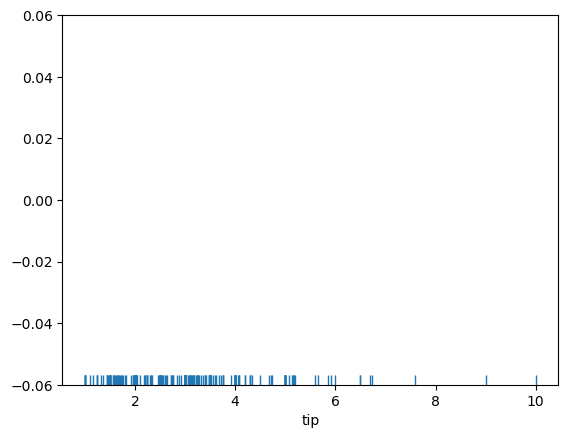

In [67]:
sns.rugplot(data=tips, x='tip')
plt.show()

Rug Plot is often used with other distribution plots like Histograms, KDEs, ECDFs.  
Here is a combined demonstration for that.

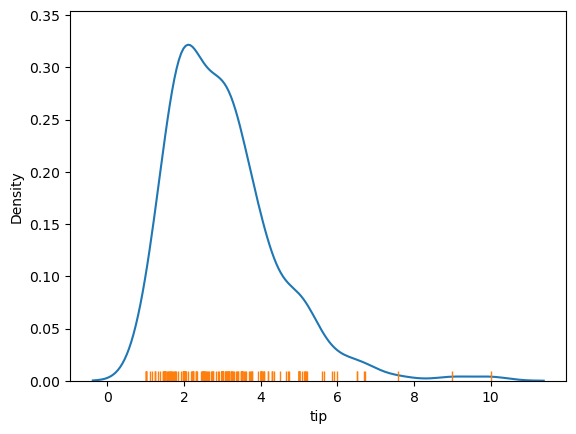

In [91]:
sns.kdeplot(data=tips, x='tip')
sns.rugplot(data=tips, x='tip')
plt.show()

### 🎯 **Bivariate Histogram & KDE**

Though, histograms & KDEs are majorly used to study the distribution of one variable, it can also be used used to study the combined distribution of two variables. Here is a clear demonstration for that.  
Lets use the `total_bill` and `tip` column of `tips` dataset.

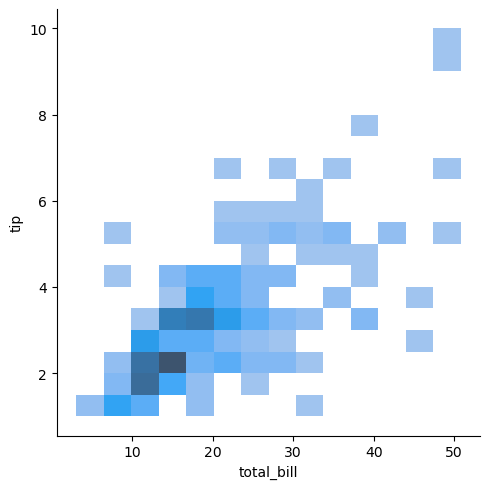

In [93]:
sns.displot(data=tips, x='total_bill', y='tip', kind='hist')
plt.show()

**INTERPRETATION :** Darker boxes represents a combination of values `(total_bill, tip)`, occuring more frequently in the data. 

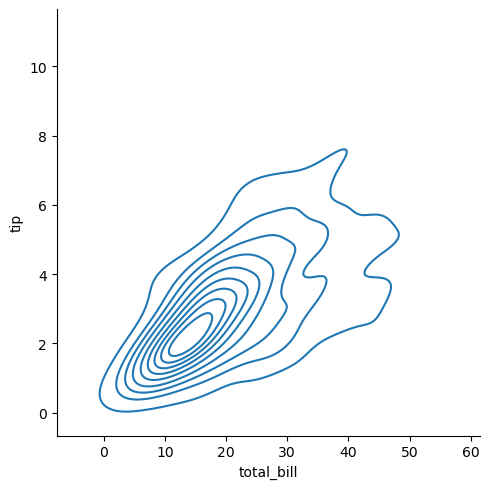

In [94]:
sns.displot(data=tips, x='total_bill', y='tip', kind='kde')
plt.show()

**INTERPRETATION :** The area where lines are much closer to each other, represents more frequent combination of `(total_bill, tip)`.

## **Matrix Plots**

### 🎯 **Heatmap**

Lets demonstrate a Heatmap using the `gap_df`.  
We will be plotting the Heatmap to study the `LifeExp` of all countries of continent `Europe`, across all years.

In [96]:
temp_df = gap_df[gap_df['continent'] == 'Europe'].pivot(index='country', columns='year', values='lifeExp')

Now, lets plot it using an Axes Level Function `sns.heatmap`.  
**NOTE :** The `annot` parameter displays the actual values in the boxes, if we set it to `True`.

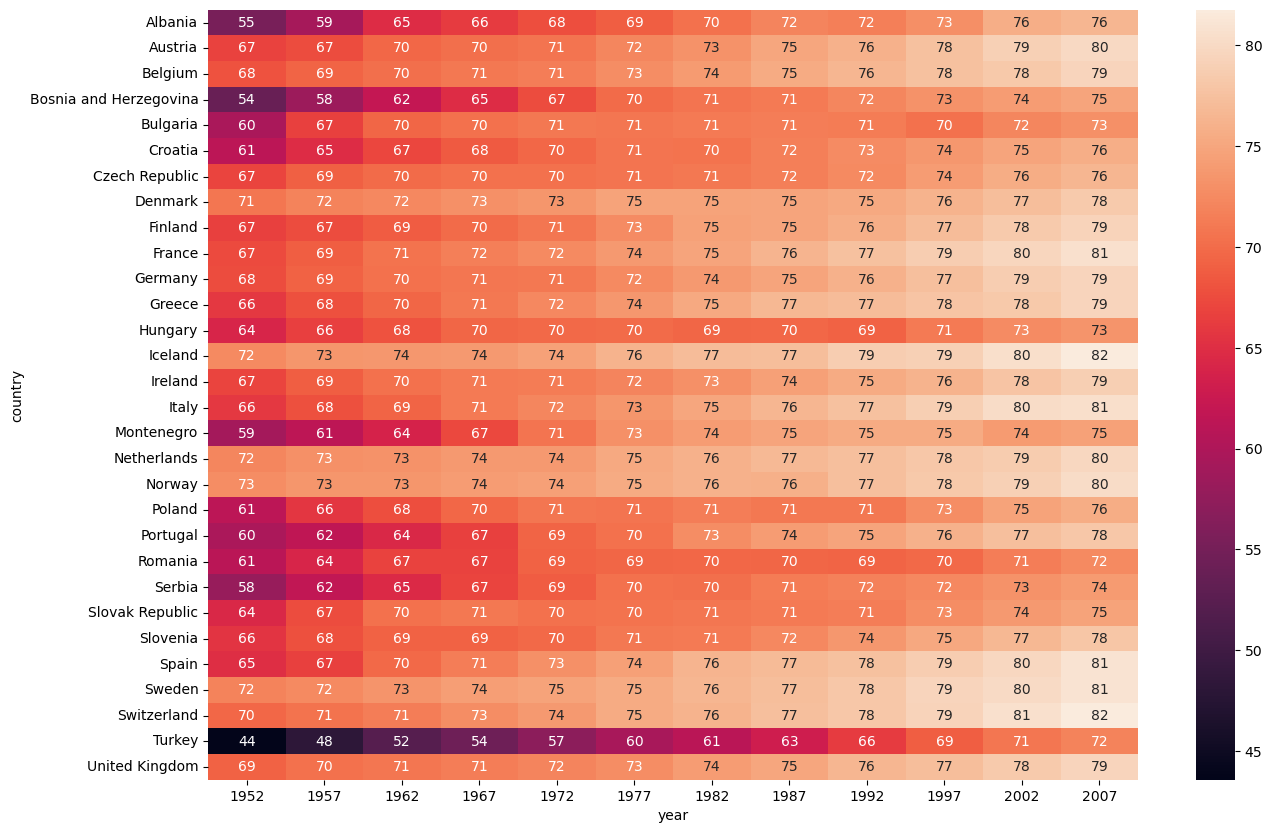

In [100]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_df, annot=True)
plt.show()

### 🎯 **Clustermap**

Here's a demonstration of a clustermap on the `iris_df`.  
For this, we just took the first 20 values from the dataset, and plotted a clustermap for the columns, like `petal_width`, `petal_length`, `sepal_width`, and `sepal_length`.

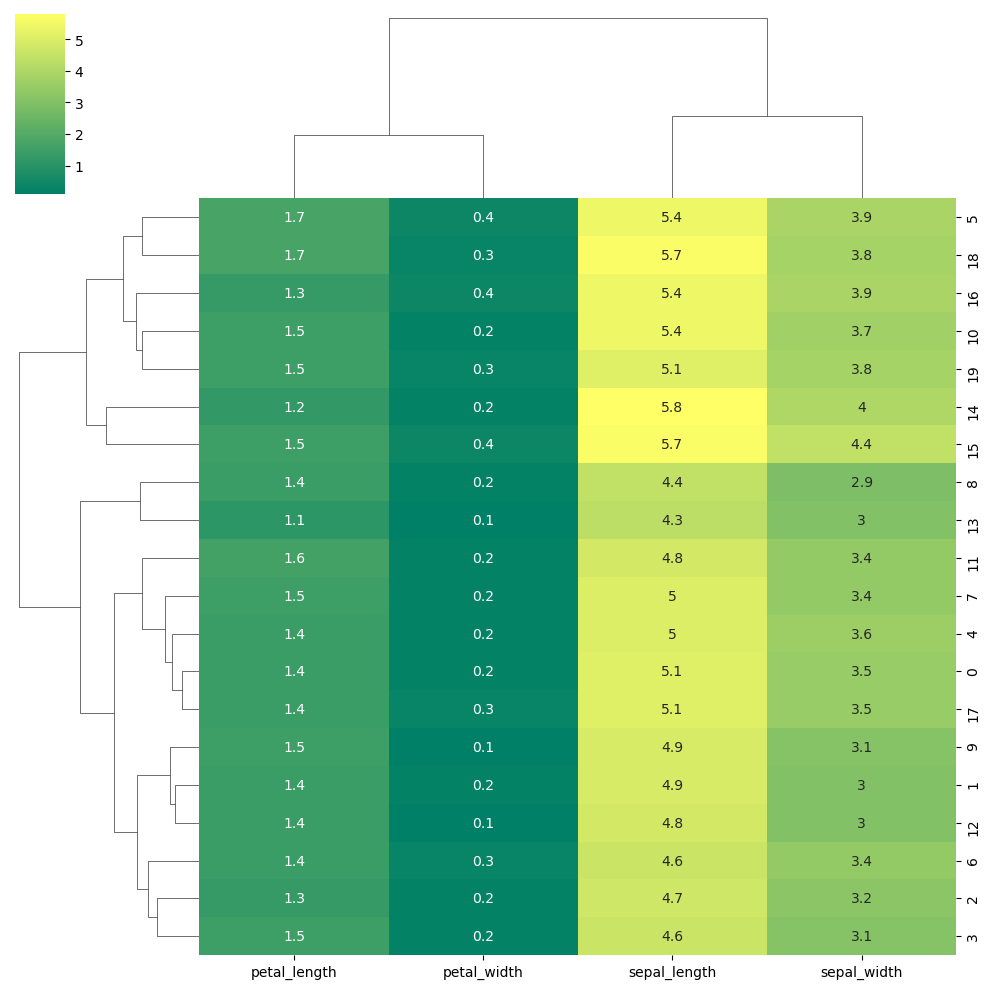

In [110]:
sns.clustermap(data=iris_df.iloc[:20, [0,1,2,3]], annot=True,
               cmap='summer')
plt.show()